# The Full Course: A Delicious Analysis of California Housing Data

Tan Zhi Xian,  
32795718 

Nithik Vijayanand,  
33890285

Nenja Ivanovic,   
33890250

Sanugi Fernando,  
33767130

Stefano Nicholas Rusli,  
33511284

Chung Lai,  
33067856

## Introduction

The california housing data shows a host of  california housing attributes related to up to 20639 locations that are measured using longitude and latitude. 

To answer the final question of "is a house's attributes or location more important in determining its price", we cleaned the data, analysed them using graphs, and also created sub questions which helped break down and clarifiy the main question, eventually resulting in a more accurate and thorough answer.

## Imports/ Set-Up

In [1]:
# Libraries, Tools, etc.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Rraw data:
raw_data = pd.read_csv('california-housing-data.csv')

# Style/ Default Customization
%matplotlib inline 

First step is to import the libary pandas, which is an open source data analysis tool for jupyter(python programming language). The purpose of importing this is to use the data structure such as dataframe, csv_file, etc. We would also need to import the library matplotlib.pyplot, which is a collection of different command style functions that make matplotlib work like MATLAB. Such as plotting lines, decorating the plot with some labels, etc. Following that, importing numpy is to provide a high performance multidimensional group of different objects, and different tools to help with this.

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Pre-Processing

### READING

In [3]:
# Taking a look at all data
raw_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [4]:
# Looking at raw data information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- only 'total_bedrooms' column has null values
- all variables are floats except ocean proximity

In [5]:
# Understanding the data (rows, columns)
raw_data.shape

(20640, 10)

<AxesSubplot:>

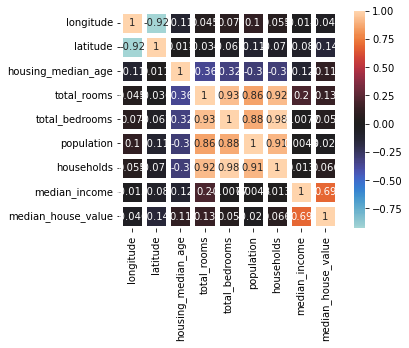

In [6]:
corr = raw_data.corr()
sns.heatmap(corr, annot = True, center = 0, square = True, linewidth = 5)

### REMOVING MISSING VALUES

In [7]:
# Raw data with all rows that have a null value removed
raw_data_without_nulls = raw_data.dropna()
raw_data_without_nulls.reset_index(inplace=True,drop=True)

raw_data_without_nulls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 20640 house entries is reduced to 20433 = loss of 207.
- a loss of 207 rows is not significant; there are still more than 20,000 house entries, which is plenty for thorough analysis.

### DEALING WITH OUTLIERS

#### Viewing Outliers of all Variables using Boxplots

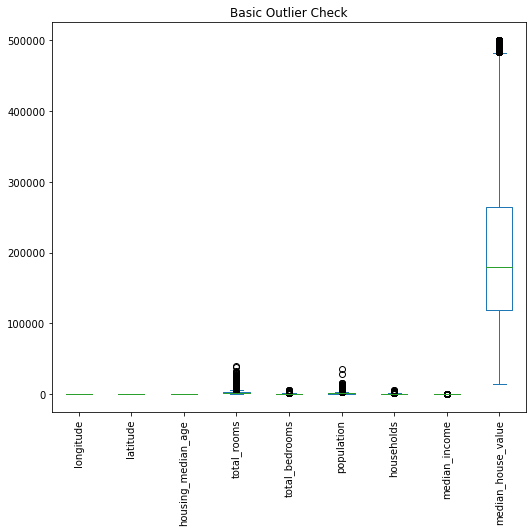

In [87]:
# Basic boxplot check:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.50, 7.5]
plt.rcParams["figure.autolayout"] = True
 
# Pandas dataframe
data = pd.DataFrame({"Box1": np.random.rand(10), "Box2": np.random.rand(10)})

# Plot the dataframe
ax = raw_data_without_nulls.plot(kind='box', title='Basic Outlier Check')
plt.xticks(rotation = 90) 

# Display the plot
plt.show()

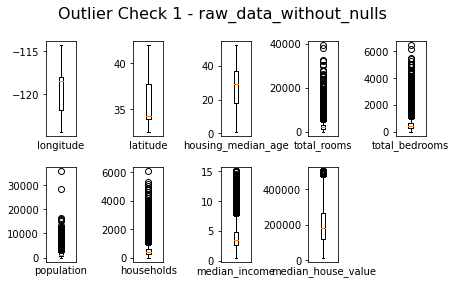

In [8]:
# Create list of column names
column_names = list(raw_data_without_nulls.columns.values)

# Initialize 'fig1', and customize
fig1, outlier_check1= plt.subplots(2,5)
fig1.suptitle('Outlier Check 1 - raw_data_without_nulls', fontsize=16)
plt.rcParams["figure.figsize"] = [10,8]
plt.tight_layout(pad=1, w_pad=2.5, h_pad=1.0)

# Add bloxpots to 'fig1': 
r = 0 #row
c = 0 #column
for name in column_names:
    if name == 'ocean_proximity':
        break #'ocean_proximity' is the last column name, and does not have a boxplot.
    outlier_check1[r,c].boxplot(raw_data_without_nulls[name])
    outlier_check1[r,c].set_xlabel(name)
    outlier_check1[r,c].set_xticks([])
    c+=1
    if c==5:
        r = 1
        c = 0
        
fig1.delaxes(outlier_check1[1,4])
plt.show()

- 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income' and 'median_house_value' all have outliers above the boxplot for 'raw_data_without_nulls'.

In [9]:
# Finding upper fences
outlier_column_names = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

upperfences = []
for name in outlier_column_names:
    q1 = np.percentile(raw_data_without_nulls[name], 25, interpolation = 'midpoint')
    q3 = np.percentile(raw_data_without_nulls[name], 75, interpolation = 'midpoint')
    iqr = q3 - q1
    upperfence= q3+(1.5*iqr)
    upperfences.append(upperfence)
    print('upper fence of', name, 'is:', upperfence)
print(upperfences)

upper fence of total_rooms is: 5682.5
upper fence of total_bedrooms is: 1173.5
upper fence of population is: 3124.5
upper fence of households is: 1090.0
upper fence of median_income is: 8.01445
upper fence of median_house_value is: 482500.0
[5682.5, 1173.5, 3124.5, 1090.0, 8.01445, 482500.0]


In [10]:
# Finding outlier indicies
outlier_indices = []
for i in [0,1,2,3,4,5]:
    a = raw_data_without_nulls.index[(raw_data_without_nulls[outlier_column_names[i]]>(0.7493*upperfences[i]))]
    outlier_indices = outlier_indices + list(a)
    
# Removing duplicate indices in list:   
outlier_indices_set = list(set(outlier_indices))

print('No. of rows with at least one outlier:',len(outlier_indices_set))


# Finding non-outlier indicies

non_outlier_indices = []
for i in range(len(raw_data_without_nulls)):
    if i not in outlier_indices_set:
        non_outlier_indices.append(i)
    
print('No. of rows with no outliers:',len(non_outlier_indices))


No. of rows with at least one outlier: 6363
No. of rows with no outliers: 14070


- there are 6363 rows in 'raw_data_without_nulls' that contain one or more outliers. It is acceptable to remove these rows as there will still be many thousands of rows remaining (14070 rows remaining).


- because we are dealing with 9 separate box plots at the same time, you can't just remove the rows containing each boxplot's original outliers. This is because removing a row will affect the other boxplots simultaneously. Therefore, the upper fence had to be slightly lowered for each boxplot so that all the boxplots are without outliers once the rows are removed - **0.7493** was the highest dialation factor that could be applied to the true upper fence and achieve this.

In [11]:
# Saving outlier rows/values for future reference:
    # Dataframe of outlier rows which have been removed
data_outliers = raw_data_without_nulls.drop(index=non_outlier_indices)
data_outliers.reset_index(inplace=True, drop=True)
data_outliers

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122.23     37.88                41.0        880.0           129.0   
1       -122.22     37.86                21.0       7099.0          1106.0   
2       -122.24     37.85                52.0       1467.0           190.0   
3       -122.29     37.82                49.0        135.0            29.0   
4       -122.27     37.80                52.0        249.0            78.0   
...         ...       ...                 ...          ...             ...   
6358    -121.76     38.66                17.0       5320.0           984.0   
6359    -121.99     38.53                 6.0       4598.0           834.0   
6360    -121.54     39.13                18.0       4289.0          1021.0   
6361    -121.54     39.12                17.0       4251.0           899.0   
6362    -121.39     39.12                28.0      10035.0          1856.0   

      population  households  median_income  median_house_value  \
0          322.0       126.0         8.3252            452600.0   
1         2401.0      1138.0         8.3014            358500.0   
2          496.0       177.0         7.2574            352100.0   
3           86.0        23.0         6.1183             75000.0   
4          396.0        85.0         1.2434            500001.0   
...          ...         ...            ...                 ...   
6358      2866.0       928.0         4.1997            133400.0   
6359      2561.0       812.0         3.4186            127300.0   
6360      2707.0       939.0         1.3375             59600.0   
6361      3265.0       934.0         2.3496             65000.0   
6362      6912.0      1818.0         2.0943            108300.0   

     ocean_proximity  
0           NEAR BAY  
1           NEAR BAY  
2           NEAR BAY  
3           NEAR BAY  
4           NEAR BAY  
...              ...  
6358          INLAND  
6359          INLAND  
6360          INLAND  
6361          INLAND  
6362          INLAND  

[6363 rows x 10 columns]

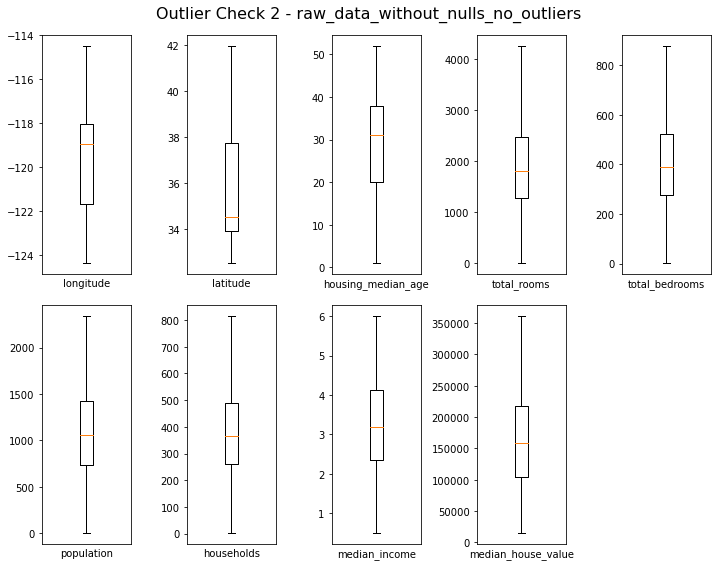

In [12]:
# New dataset without outliers:
raw_data_without_nulls_no_outliers = raw_data_without_nulls.drop(index=outlier_indices_set)
raw_data_without_nulls_no_outliers.reset_index(inplace=True, drop=True)

# Checking that outliers have been removed by repeating boxplots:
column_names = list(raw_data_without_nulls.columns.values)   
    # Initialize 'fig2', and customize
fig2, outlier_check2= plt.subplots(2,5)
fig2.suptitle('Outlier Check 2 - raw_data_without_nulls_no_outliers', fontsize=16)
plt.rcParams["figure.figsize"] = [10,8]
plt.tight_layout(pad=1, w_pad=2.5, h_pad=1.0)

    # Add bloxpots to 'fig2': 
r = 0 #row
c = 0 #column
for name in column_names:
    if name == 'ocean_proximity':
        break #'ocean_proximity' is the last column name, and does not have a boxplot.
    outlier_check2[r,c].boxplot(raw_data_without_nulls_no_outliers[name])
    outlier_check2[r,c].set_xlabel(name)
    outlier_check2[r,c].set_xticks([])
    c+=1
    if c==5:
        r = 1
        c = 0

fig2.delaxes(outlier_check2[1,4])
plt.show()

### ENCODING CATEGORICAL DATA

In [13]:
# Names within categorical column:
proximity_types = raw_data_without_nulls_no_outliers['ocean_proximity'].unique()
print('ocean_proximity types are:',proximity_types)

# Number of houses in each type of proximity:
for name in proximity_types:
    print(name,':',len(raw_data_without_nulls_no_outliers[(raw_data_without_nulls_no_outliers['ocean_proximity']==name)]))

ocean_proximity types are: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
NEAR BAY : 1450
<1H OCEAN : 5804
INLAND : 5101
NEAR OCEAN : 1713
ISLAND : 2


- the 'ISLAND' type only has two values, so will not be useful for analysis. However,I will not get rid of these of these rows because it might mess up the boxplots and reintroduce new outliers. Keeping these rows will not interfere with any analysis anyways.

In [14]:
new_column_names = ['near_bay','within_1h_of_ocean','inland','near_ocean','island']

# Create lists containing values of new columns
near_bay_list = []
within_1h_of_ocean_list = []
inland_list = []
near_ocean_list = []
island_list = []

new_column_lists = [near_bay_list,within_1h_of_ocean_list,inland_list,near_ocean_list,island_list]

# Add 1 to list at indexes where house has proximity type, 0 where it does not:
for n in [0,1,2,3,4]:
    for i in range(len(raw_data_without_nulls_no_outliers)):
            if raw_data_without_nulls_no_outliers.ocean_proximity[i]==proximity_types[n]:
                new_column_lists[n].append(1)
            else:
                new_column_lists[n].append(0)
                
# Check to see that new column values are correct (match with true number of houses in that proximity type):              
for n in [0,1,2,3,4]:
    print(new_column_names[n],':', new_column_lists[n].count(1))
    

near_bay : 1450
within_1h_of_ocean : 5804
inland : 5101
near_ocean : 1713
island : 2


In [15]:
#old dataframe (without new columns):
raw_data_without_nulls_no_outliers = raw_data_without_nulls.drop(index=outlier_indices_set)
raw_data_without_nulls_no_outliers.reset_index(inplace=True, drop=True)

#adding new columns
raw_data_without_nulls_no_outliers_extracolumns = raw_data_without_nulls_no_outliers
for n in [0,1,2,3,4]:
    raw_data_without_nulls_no_outliers_extracolumns.insert(loc=10+n,column=new_column_names[n],value=new_column_lists[n])

#dropping categorical column
raw_data_without_nulls_no_outliers_extracolumns.drop(columns='ocean_proximity')
#rename new dataframe:
full_data_clean = raw_data_without_nulls_no_outliers_extracolumns

#new dataframe (with new columns):
full_data_clean

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.25     37.85                52.0       1274.0           235.0   
1        -122.25     37.85                52.0       1627.0           280.0   
2        -122.25     37.85                52.0        919.0           213.0   
3        -122.25     37.84                52.0       2535.0           489.0   
4        -122.25     37.84                52.0       3104.0           687.0   
...          ...       ...                 ...          ...             ...   
14065    -121.09     39.48                25.0       1665.0           374.0   
14066    -121.21     39.49                18.0        697.0           150.0   
14067    -121.22     39.43                17.0       2254.0           485.0   
14068    -121.32     39.43                18.0       1860.0           409.0   
14069    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           558.0       219.0         5.6431            341300.0   
1           565.0       259.0         3.8462            342200.0   
2           413.0       193.0         4.0368            269700.0   
3          1094.0       514.0         3.6591            299200.0   
4          1157.0       647.0         3.1200            241400.0   
...           ...         ...            ...                 ...   
14065       845.0       330.0         1.5603             78100.0   
14066       356.0       114.0         2.5568             77100.0   
14067      1007.0       433.0         1.7000             92300.0   
14068       741.0       349.0         1.8672             84700.0   
14069      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  near_bay  within_1h_of_ocean  inland  near_ocean  \
0            NEAR BAY         1                   0       0           0   
1            NEAR BAY         1                   0       0           0   
2            NEAR BAY         1                   0       0           0   
3            NEAR BAY         1                   0       0           0   
4            NEAR BAY         1                   0       0           0   
...               ...       ...                 ...     ...         ...   
14065          INLAND         0                   0       1           0   
14066          INLAND         0                   0       1           0   
14067          INLAND         0                   0       1           0   
14068          INLAND         0                   0       1           0   
14069          INLAND         0                   0       1           0   

       island  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
14065       0  
14066       0  
14067       0  
14068       0  
14069       0  

[14070 rows x 15 columns]

### FEATURE SCALING - STANDARDISATION

In [16]:
#drop columns that shouldn't be standardised:
column_names = list(full_data_clean.columns.values)
column_names_dropping = []
for i in range(0,15):
    if i in [0,1,9,10,11,12,13,14]:
        column_names_dropping.append(column_names[i])       
standard_base_data = full_data_clean.drop(columns = column_names_dropping) 

#standardise the 'base data', and convert into a dataframe - ensuring that column names are correct:
column_names_new= ['housing_median_age_z',
 'total_rooms_z',
 'total_bedrooms_z',
 'population_z',
 'households_z',
 'median_income_z',
 'median_house_value_z']
                   
scaler= StandardScaler()  
standard_data = round(pd.DataFrame(scaler.fit_transform(standard_base_data), columns=column_names_new),3)

#display:
standard_data

housing_median_age_z  total_rooms_z  total_bedrooms_z  population_z  \
0                     1.801         -0.719            -0.939        -1.082   
1                     1.801         -0.314            -0.687        -1.067   
2                     1.801         -1.126            -1.062        -1.376   
3                     1.801          0.727             0.482         0.007   
4                     1.801          1.379             1.590         0.135   
...                     ...            ...               ...           ...   
14065                -0.441         -0.271            -0.161        -0.499   
14066                -1.023         -1.380            -1.415        -1.492   
14067                -1.106          0.404             0.460        -0.169   
14068                -1.023         -0.047             0.034        -0.710   
14069                -1.189          1.013             1.193         0.603   

       households_z  median_income_z  median_house_value_z  
0            -0.946            1.996                 2.340  
1            -0.706            0.475                 2.352  
2            -1.102            0.636                 1.383  
3             0.822            0.316                 1.778  
4             1.619           -0.140                 1.005  
...             ...              ...                   ...  
14065        -0.281           -1.461                -1.176  
14066        -1.575           -0.617                -1.190  
14067         0.337           -1.343                -0.986  
14068        -0.167           -1.201                -1.088  
14069         0.918           -0.760                -1.025  

[14070 rows x 7 columns]

In [17]:
# Checking the data:
round(standard_data.describe(),3)

housing_median_age_z  total_rooms_z  total_bedrooms_z  population_z  \
count             14070.000      14070.000         14070.000     14070.000   
mean                 -0.000         -0.000            -0.000        -0.000   
std                   1.000          1.000             1.000         1.000   
min                  -2.435         -2.177            -2.243        -2.209   
25%                  -0.856         -0.712            -0.715        -0.720   
50%                   0.057         -0.102            -0.083        -0.076   
75%                   0.639          0.653             0.667         0.680   
max                   1.801          2.700             2.659         2.541   

       households_z  median_income_z  median_house_value_z  
count     14070.000        14070.000             14070.000  
mean          0.000            0.000                -0.000  
std           1.000            1.000                 1.000  
min          -2.246           -2.359                -2.019  
25%          -0.700           -0.782                -0.821  
50%          -0.077           -0.073                -0.102  
75%           0.672            0.720                 0.682  
max           2.632            2.303                 2.610

In [18]:
# Incomplete data:
standard_data = round(pd.DataFrame(scaler.fit_transform(standard_base_data), columns=column_names_new),3)

# Complete standardized data:
full_standard_data = standard_data
column_names = list(full_data_clean.columns.values)
for i in [0,1,9,10,11,12,13,14]:
    full_standard_data.insert(loc=i,column=column_names[i],value=full_data_clean[column_names[i]])
    
# Display:
full_standard_data

longitude  latitude  housing_median_age_z  total_rooms_z  \
0        -122.25     37.85                 1.801         -0.719   
1        -122.25     37.85                 1.801         -0.314   
2        -122.25     37.85                 1.801         -1.126   
3        -122.25     37.84                 1.801          0.727   
4        -122.25     37.84                 1.801          1.379   
...          ...       ...                   ...            ...   
14065    -121.09     39.48                -0.441         -0.271   
14066    -121.21     39.49                -1.023         -1.380   
14067    -121.22     39.43                -1.106          0.404   
14068    -121.32     39.43                -1.023         -0.047   
14069    -121.24     39.37                -1.189          1.013   

       total_bedrooms_z  population_z  households_z  median_income_z  \
0                -0.939        -1.082        -0.946            1.996   
1                -0.687        -1.067        -0.706            0.475   
2                -1.062        -1.376        -1.102            0.636   
3                 0.482         0.007         0.822            0.316   
4                 1.590         0.135         1.619           -0.140   
...                 ...           ...           ...              ...   
14065            -0.161        -0.499        -0.281           -1.461   
14066            -1.415        -1.492        -1.575           -0.617   
14067             0.460        -0.169         0.337           -1.343   
14068             0.034        -0.710        -0.167           -1.201   
14069             1.193         0.603         0.918           -0.760   

       median_house_value_z ocean_proximity  near_bay  within_1h_of_ocean  \
0                     2.340        NEAR BAY         1                   0   
1                     2.352        NEAR BAY         1                   0   
2                     1.383        NEAR BAY         1                   0   
3                     1.778        NEAR BAY         1                   0   
4                     1.005        NEAR BAY         1                   0   
...                     ...             ...       ...                 ...   
14065                -1.176          INLAND         0                   0   
14066                -1.190          INLAND         0                   0   
14067                -0.986          INLAND         0                   0   
14068                -1.088          INLAND         0                   0   
14069                -1.025          INLAND         0                   0   

       inland  near_ocean  island  
0           0           0       0  
1           0           0       0  
2           0           0       0  
3           0           0       0  
4           0           0       0  
...       ...         ...     ...  
14065       1           0       0  
14066       1           0       0  
14067       1           0       0  
14068       1           0       0  
14069       1           0       0  

[14070 rows x 15 columns]

### SPLITTING THE DATASET

**TRAINING AND TESTING SPLITS**

In [19]:
#splitting into 'training' and 'testing' data (for both standardised and non-standardised dataframes):
full_data_clean_train, full_data_clean_test = train_test_split(full_data_clean, test_size= 0.2, random_state=42) 
full_standard_data_train, full_standard_data_test = train_test_split(full_standard_data, test_size= 0.2, random_state=42)

In [20]:
full_data_clean_train

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14069    -121.24     39.37                16.0       2785.0           616.0   
7051     -122.25     38.17                34.0        778.0           137.0   
1897     -120.37     36.15                34.0       2084.0           339.0   
12625    -122.29     40.47                20.0       2858.0           612.0   
6676     -123.15     39.74                23.0        608.0           143.0   
...          ...       ...                 ...          ...             ...   
5191     -118.19     34.03                31.0        525.0           136.0   
13418    -122.19     40.20                30.0       2750.0           476.0   
5390     -118.20     33.94                44.0       1413.0           298.0   
860      -121.63     39.75                37.0       1296.0           296.0   
7270     -117.91     33.88                34.0       1851.0           291.0   

       population  households  median_income  median_house_value  \
14069      1387.0       530.0         2.3886             89400.0   
7051        406.0       136.0         4.2955            121300.0   
1897        868.0       347.0         4.3810             86300.0   
12625      1422.0       589.0         1.9657             63000.0   
6676        281.0       108.0         2.9306             70000.0   
...           ...         ...            ...                 ...   
5191        627.0       145.0         2.6964            125000.0   
13418      1296.0       464.0         3.5305             73600.0   
5390       1200.0       307.0         3.5125            169300.0   
860         569.0       257.0         1.8616             70500.0   
7270        784.0       290.0         5.2336            235600.0   

      ocean_proximity  near_bay  within_1h_of_ocean  inland  near_ocean  \
14069          INLAND         0                   0       1           0   
7051         NEAR BAY         1                   0       0           0   
1897           INLAND         0                   0       1           0   
12625          INLAND         0                   0       1           0   
6676           INLAND         0                   0       1           0   
...               ...       ...                 ...     ...         ...   
5191        <1H OCEAN         0                   1       0           0   
13418          INLAND         0                   0       1           0   
5390        <1H OCEAN         0                   1       0           0   
860            INLAND         0                   0       1           0   
7270        <1H OCEAN         0                   1       0           0   

       island  
14069       0  
7051        0  
1897        0  
12625       0  
6676        0  
...       ...  
5191        0  
13418       0  
5390        0  
860         0  
7270        0  

[11256 rows x 15 columns]

In [21]:
full_data_clean_test

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5688     -118.06     33.91                36.0       1360.0           271.0   
12731    -122.25     38.11                49.0       2365.0           504.0   
4096     -118.26     33.78                21.0       2188.0           706.0   
10217    -117.11     32.57                32.0       2723.0           586.0   
2848     -118.44     34.22                41.0       1582.0           399.0   
...          ...       ...                 ...          ...             ...   
5964     -118.18     33.80                15.0       2407.0           589.0   
9863     -117.13     32.72                43.0       2160.0           504.0   
1272     -122.33     37.95                42.0       1627.0           336.0   
5421     -118.20     33.93                36.0       2210.0           634.0   
10508    -117.30     33.08                24.0       2628.0           527.0   

       population  households  median_income  median_house_value  \
5688        909.0       275.0         4.6731            173300.0   
12731      1131.0       458.0         2.6133            103100.0   
4096       2265.0       652.0         1.9923            164700.0   
10217      1702.0       562.0         3.3371            140500.0   
2848       1159.0       378.0         2.8250            168600.0   
...           ...         ...            ...                 ...   
5964       1591.0       506.0         3.0513            148100.0   
9863       1221.0       452.0         2.4821            140600.0   
1272        848.0       316.0         3.7708            144600.0   
5421       2341.0       553.0         2.1715            131100.0   
10508      1389.0       520.0         4.0000            343200.0   

      ocean_proximity  near_bay  within_1h_of_ocean  inland  near_ocean  \
5688        <1H OCEAN         0                   1       0           0   
12731        NEAR BAY         1                   0       0           0   
4096       NEAR OCEAN         0                   0       0           1   
10217      NEAR OCEAN         0                   0       0           1   
2848        <1H OCEAN         0                   1       0           0   
...               ...       ...                 ...     ...         ...   
5964       NEAR OCEAN         0                   0       0           1   
9863       NEAR OCEAN         0                   0       0           1   
1272         NEAR BAY         1                   0       0           0   
5421        <1H OCEAN         0                   1       0           0   
10508      NEAR OCEAN         0                   0       0           1   

       island  
5688        0  
12731       0  
4096        0  
10217       0  
2848        0  
...       ...  
5964        0  
9863        0  
1272        0  
5421        0  
10508       0  

[2814 rows x 15 columns]

In [22]:
full_standard_data_train

longitude  latitude  housing_median_age_z  total_rooms_z  \
14069    -121.24     39.37                -1.189          1.013   
7051     -122.25     38.17                 0.306         -1.287   
1897     -120.37     36.15                 0.306          0.210   
12625    -122.29     40.47                -0.856          1.097   
6676     -123.15     39.74                -0.607         -1.482   
...          ...       ...                   ...            ...   
5191     -118.19     34.03                 0.057         -1.577   
13418    -122.19     40.20                -0.026          0.973   
5390     -118.20     33.94                 1.137         -0.559   
860      -121.63     39.75                 0.556         -0.694   
7270     -117.91     33.88                 0.306         -0.057   

       total_bedrooms_z  population_z  households_z  median_income_z  \
14069             1.193         0.603         0.918           -0.760   
7051             -1.487        -1.390        -1.443            0.855   
1897             -0.357        -0.452        -0.179            0.927   
12625             1.170         0.674         1.272           -1.118   
6676             -1.454        -1.644        -1.611           -0.301   
...                 ...           ...           ...              ...   
5191             -1.493        -0.941        -1.389           -0.499   
13418             0.409         0.418         0.522            0.207   
5390             -0.587         0.223        -0.418            0.192   
860              -0.598        -1.059        -0.718           -1.206   
7270             -0.626        -0.623        -0.520            1.649   

       median_house_value_z ocean_proximity  near_bay  within_1h_of_ocean  \
14069                -1.025          INLAND         0                   0   
7051                 -0.599        NEAR BAY         1                   0   
1897                 -1.067          INLAND         0                   0   
12625                -1.378          INLAND         0                   0   
6676                 -1.284          INLAND         0                   0   
...                     ...             ...       ...                 ...   
5191                 -0.550       <1H OCEAN         0                   1   
13418                -1.236          INLAND         0                   0   
5390                  0.042       <1H OCEAN         0                   1   
860                  -1.278          INLAND         0                   0   
7270                  0.928       <1H OCEAN         0                   1   

       inland  near_ocean  island  
14069       1           0       0  
7051        0           0       0  
1897        1           0       0  
12625       1           0       0  
6676        1           0       0  
...       ...         ...     ...  
5191        0           0       0  
13418       1           0       0  
5390        0           0       0  
860         1           0       0  
7270        0           0       0  

[11256 rows x 15 columns]

In [23]:
full_standard_data_test

longitude  latitude  housing_median_age_z  total_rooms_z  \
5688     -118.06     33.91                 0.473         -0.620   
12731    -122.25     38.11                 1.552          0.532   
4096     -118.26     33.78                -0.773          0.329   
10217    -117.11     32.57                 0.140          0.942   
2848     -118.44     34.22                 0.888         -0.366   
...          ...       ...                   ...            ...   
5964     -118.18     33.80                -1.272          0.580   
9863     -117.13     32.72                 1.054          0.297   
1272     -122.33     37.95                 0.971         -0.314   
5421     -118.20     33.93                 0.473          0.354   
10508    -117.30     33.08                -0.524          0.833   

       total_bedrooms_z  population_z  households_z  median_income_z  \
5688             -0.738        -0.369        -0.610            1.175   
12731             0.566         0.082         0.486           -0.569   
4096              1.696         2.386         1.649           -1.095   
10217             1.025         1.243         1.110            0.043   
2848             -0.022         0.139         0.007           -0.390   
...                 ...           ...           ...              ...   
5964              1.042         1.017         0.774           -0.199   
9863              0.566         0.265         0.451           -0.681   
1272             -0.374        -0.492        -0.364            0.411   
5421              1.293         2.541         1.056           -0.944   
10508             0.695         0.607         0.858            0.605   

       median_house_value_z ocean_proximity  near_bay  within_1h_of_ocean  \
5688                  0.096       <1H OCEAN         0                   1   
12731                -0.842        NEAR BAY         1                   0   
4096                 -0.019      NEAR OCEAN         0                   0   
10217                -0.343      NEAR OCEAN         0                   0   
2848                  0.033       <1H OCEAN         0                   1   
...                     ...             ...       ...                 ...   
5964                 -0.241      NEAR OCEAN         0                   0   
9863                 -0.341      NEAR OCEAN         0                   0   
1272                 -0.288        NEAR BAY         1                   0   
5421                 -0.468       <1H OCEAN         0                   1   
10508                 2.365      NEAR OCEAN         0                   0   

       inland  near_ocean  island  
5688        0           0       0  
12731       0           0       0  
4096        0           1       0  
10217       0           1       0  
2848        0           0       0  
...       ...         ...     ...  
5964        0           1       0  
9863        0           1       0  
1272        0           0       0  
5421        0           0       0  
10508       0           1       0  

[2814 rows x 15 columns]

**CATEGORICAL SPLITS - OCEAN PROXIMITY**

In [24]:
# Non-standardised
column_names = list(full_data_clean.columns.values)
categorical_column_names = []
for i in [10,11,12,13,14]:
    categorical_column_names.append(column_names[i])
    # Dropping unnecessary columns:
full_data_clean_train_cat = full_data_clean_train.drop(columns=categorical_column_names)
full_data_clean_test_cat = full_data_clean_test.drop(columns=categorical_column_names)
    # Grouping
non_stan_train_cat = full_data_clean_train_cat.groupby('ocean_proximity')
non_stan_test_cat = full_data_clean_test_cat.groupby('ocean_proximity')    
    
    
# Standardised
column_names_z = list(full_standard_data.columns.values)
categorical_column_names_z = []
for i in [10,11,12,13,14]:
    categorical_column_names_z.append(column_names_z[i])
    # Dropping unnecessary columns:
full_standard_data_train_cat = full_standard_data_train.drop(columns=categorical_column_names_z)
full_standard_data_test_cat = full_standard_data_test.drop(columns=categorical_column_names_z)
    # Grouping
stan_train_cat = full_standard_data_train_cat.groupby('ocean_proximity')
stan_test_cat = full_standard_data_test_cat.groupby('ocean_proximity')

In [25]:
#example of a group:
non_stan_train_cat.get_group('NEAR OCEAN')

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
13815    -119.18     34.26                22.0       2334.0           359.0   
9892     -117.15     32.72                52.0        344.0           177.0   
11749    -119.72     34.42                52.0       1759.0           387.0   
9963     -117.25     32.80                37.0       1096.0           260.0   
11442    -120.82     35.31                16.0       3924.0           699.0   
...          ...       ...                 ...          ...             ...   
10555    -117.38     33.21                31.0       1502.0           367.0   
9998     -117.23     32.87                11.0       3123.0           740.0   
2047     -124.14     40.59                17.0       2985.0           610.0   
13803    -119.22     34.34                29.0       3128.0           672.0   
11636    -122.31     37.57                31.0       2197.0           477.0   

       population  households  median_income  median_house_value  \
13815      1298.0       363.0         5.5275            228900.0   
9892        460.0       147.0         1.2292            137500.0   
11749       980.0       402.0         4.0125            261000.0   
9963        490.0       267.0         3.2663            270600.0   
11442      1325.0       638.0         2.5172            293900.0   
...           ...         ...            ...                 ...   
10555      1514.0       342.0         2.6442            103300.0   
9998       1223.0       634.0         5.4170            196800.0   
2047       1544.0       584.0         2.1780             76800.0   
13803      1815.0       648.0         2.9821            175700.0   
11636      1193.0       394.0         4.6371            271100.0   

      ocean_proximity  
13815      NEAR OCEAN  
9892       NEAR OCEAN  
11749      NEAR OCEAN  
9963       NEAR OCEAN  
11442      NEAR OCEAN  
...               ...  
10555      NEAR OCEAN  
9998       NEAR OCEAN  
2047       NEAR OCEAN  
13803      NEAR OCEAN  
11636      NEAR OCEAN  

[1355 rows x 10 columns]

In [26]:
#another example of a group:
stan_train_cat.get_group('NEAR BAY')

longitude  latitude  housing_median_age_z  total_rooms_z  \
7051     -122.25     38.17                 0.306         -1.287   
11616    -122.31     37.60                 0.306          1.517   
10876    -122.41     37.73                 0.971          0.806   
12746    -122.17     38.06                -1.189          1.850   
733      -122.02     37.54                 0.057         -0.758   
...          ...       ...                   ...            ...   
7041     -122.31     38.30                 1.220          1.286   
11016    -122.46     37.78                 1.801          0.302   
1267     -122.33     37.95                -0.690          0.227   
189      -122.20     37.79                 1.552         -1.168   
466      -122.10     37.72                -0.026          0.800   

       total_bedrooms_z  population_z  households_z  median_income_z  \
7051             -1.487        -1.390        -1.443            0.855   
11616             1.808         1.763         1.673            0.335   
10876             0.952         1.245         0.780            0.116   
12746             1.249         1.369         1.493            0.977   
733              -0.777        -0.755        -0.844            0.211   
...                 ...           ...           ...              ...   
7041              1.433         1.419         1.679            0.269   
11016             0.991        -0.048         0.918           -0.302   
1267              0.930         0.091         0.792           -0.927   
189              -1.163        -0.718        -1.000           -0.524   
466              -0.206        -0.342        -0.161            2.161   

       median_house_value_z ocean_proximity  
7051                 -0.599        NEAR BAY  
11616                 1.428        NEAR BAY  
10876                 0.856        NEAR BAY  
12746                 0.280        NEAR BAY  
733                   0.590        NEAR BAY  
...                     ...             ...  
7041                 -0.536        NEAR BAY  
11016                 2.456        NEAR BAY  
1267                 -0.606        NEAR BAY  
189                  -0.590        NEAR BAY  
466                   2.192        NEAR BAY  

[1140 rows x 10 columns]

### SUMMARY OF PRE-PROCESSING

FULL DATA SETS:

1. full_data_clean 
- contains all original variables
- contains additional columns of encoded ocean_proximity (i.e. there is column just for 'NEAR BAY' with only 1s and 0s, etc.)
- no missing values
- no outliers
- data is expressed as the actual measurement (i.e. median_house_value is in dollar value, not z-score, etc.)


2. data_outliers
- contains all rows that were removed from full_data_clean because they contained one or more outliers
- no missing values


3. full_standard_data
- same as full_clean_data, but the numerical values are represented as a z-score relative to their column (they have been standardised so that they can be compared better).
- categorical columns remain identical to full_data_clean (e.g. latitude, longitude, ocean_proximity, etc.)


---------------------------------------------------------------------------------------------------------------------
TRAINING AND TESTING SETS:
1. full_data_clean_train
- same as full_data_clean, but only 80% of it (random seed = 42 ; complementary to full_data_clean_test) - to be used for exploratory analysis/ modelling


2. full_data_clean_test
- same as full_data_clean, but only 20% of it (random seed = 42 ; complementary to full_data_clean_train) - to be used to test models.


3. full_standard_data_train
- same as full_standard_data, but only 80% of it (random seed = 42 ; complementary to full_standard_data_test) - to be used for exploratory analysis/ modelling


4. full_standard_data_test
- same as full_standard_data, but only 20% of it (random seed = 42 ; complementary to full_standard_data_train) - to be used to test models.


---------------------------------------------------------------------------------------------------------------------
CATEGORICAL GROUPING:
- all grouped by 'ocean_proximity'
- extra 'ocean_proximity' columns used for encoding have been removed.


1. non_stan_train_cat
- same as full_data_clean_train, but grouped.


2. non_stan_test_cat
- same as full_data_clean_test, but grouped.


3. stan_train_cat
- same as full_standard_data_train, but grouped.

4. stan_test_cat
- same as full_standard_data_test, but grouped.



## Exploratory Data Analysis

### 1. What can the distribution of House Age tell us?

In [27]:
full_data_clean.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  14070.000000  14070.000000        14070.000000  14070.000000   
mean    -119.617369     35.766591           30.310661   1901.114428   
std        2.002482      2.205324           12.040078    872.525488   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.650000     33.950000           20.000000   1280.000000   
50%     -118.950000     34.525000           31.000000   1812.500000   
75%     -118.050000     37.760000           38.000000   2471.000000   
max     -114.490000     41.950000           52.000000   4257.000000   

       total_bedrooms    population    households  median_income  \
count    14070.000000  14070.000000  14070.000000   14070.000000   
mean       402.842999   1090.408458    376.819474       3.285798   
std        178.730173    492.224671    166.879930       1.180968   
min          2.000000      3.000000      2.000000       0.499900   
25%        275.000000    736.000000    260.000000       2.362500   
50%        388.000000   1053.000000    364.000000       3.200000   
75%        522.000000   1425.000000    489.000000       4.136050   
max        878.000000   2341.000000    816.000000       6.005000   

       median_house_value      near_bay  within_1h_of_ocean        inland  \
count        14070.000000  14070.000000        14070.000000  14070.000000   
mean        166140.376404      0.103056            0.412509      0.362544   
std          74856.864633      0.304043            0.492303      0.480752   
min          14999.000000      0.000000            0.000000      0.000000   
25%         104700.000000      0.000000            0.000000      0.000000   
50%         158550.000000      0.000000            0.000000      0.000000   
75%         217175.000000      0.000000            1.000000      1.000000   
max         361500.000000      1.000000            1.000000      1.000000   

         near_ocean        island  
count  14070.000000  14070.000000  
mean       0.121748      0.000142  
std        0.327007      0.011922  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000

Shows us that the maximum age that a house can be in California is 52 years old. We know that the data caps at housing age being at 52 even if the house ages between 52 to 100. There exists a region with over 10 times the total average of rooms, a region with more than 10 times the average of households, a region with more than double the median house value, and a region with over triple the median income value. 

Text(0, 0.5, 'Density')

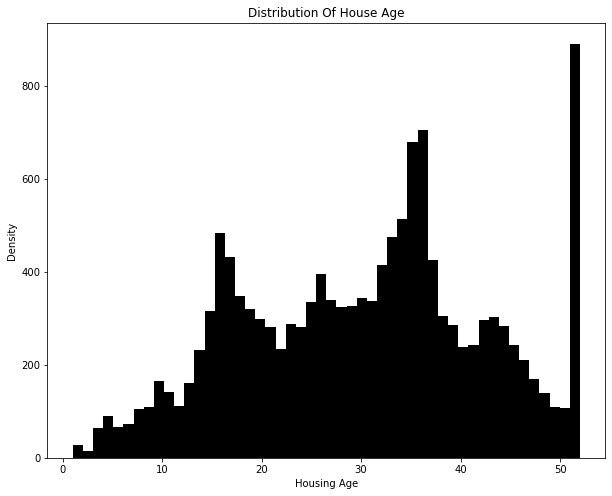

In [28]:
# Hence, plotting a graph to see whether speculation is true.
fig = plt.hist(full_data_clean.housing_median_age, bins = 50, color = 'black')
plt.title('Distribution Of House Age')
plt.xlabel('Housing Age')
plt.ylabel('Density')

Yes, speculation was right as there are hundred of houses being capped at 52. We can also use this histogram to look at the range of distribution of housing ages throughout california. In this data, we can see that there are a lot of houses age between 30 - 40 years. We can also see that there are not many houses built recently as the graph shows us the amount of houses built in the last 10 years. 

<AxesSubplot:xlabel='housing_median_age'>

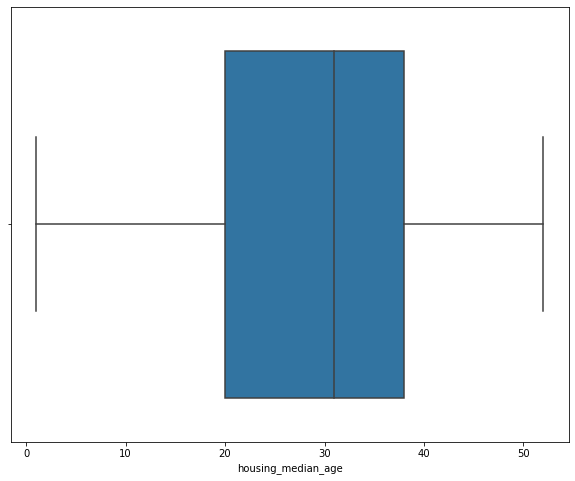

In [29]:
sns.boxplot(full_data_clean['housing_median_age'])

In this boxplot, we can see that the upper quartile of the housing age being 38 years, lower quartile of the housing age being 20 years and the median being 31. This tells us that most houses were built 20 to 38 years ago and mostly around 31 years ago.

In [30]:
# Choosing only house median age of less than 52. 
housing_age_50 = full_data_clean[(full_data_clean.housing_median_age < 52)]
housing_age_50

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5        -122.26     37.84                42.0       2555.0           665.0   
12       -122.26     37.85                50.0       1120.0           283.0   
15       -122.26     37.84                50.0       2239.0           455.0   
17       -122.27     37.85                40.0        751.0           184.0   
18       -122.27     37.85                42.0       1639.0           367.0   
...          ...       ...                 ...          ...             ...   
14065    -121.09     39.48                25.0       1665.0           374.0   
14066    -121.21     39.49                18.0        697.0           150.0   
14067    -121.22     39.43                17.0       2254.0           485.0   
14068    -121.32     39.43                18.0       1860.0           409.0   
14069    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
5          1206.0       595.0         2.0804            226700.0   
12          697.0       264.0         2.1250            140000.0   
15          990.0       419.0         1.9911            158700.0   
17          409.0       166.0         1.3578            147500.0   
18          929.0       366.0         1.7135            159800.0   
...           ...         ...            ...                 ...   
14065       845.0       330.0         1.5603             78100.0   
14066       356.0       114.0         2.5568             77100.0   
14067      1007.0       433.0         1.7000             92300.0   
14068       741.0       349.0         1.8672             84700.0   
14069      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  near_bay  within_1h_of_ocean  inland  near_ocean  \
5            NEAR BAY         1                   0       0           0   
12           NEAR BAY         1                   0       0           0   
15           NEAR BAY         1                   0       0           0   
17           NEAR BAY         1                   0       0           0   
18           NEAR BAY         1                   0       0           0   
...               ...       ...                 ...     ...         ...   
14065          INLAND         0                   0       1           0   
14066          INLAND         0                   0       1           0   
14067          INLAND         0                   0       1           0   
14068          INLAND         0                   0       1           0   
14069          INLAND         0                   0       1           0   

       island  
5           0  
12          0  
15          0  
17          0  
18          0  
...       ...  
14065       0  
14066       0  
14067       0  
14068       0  
14069       0  

[13218 rows x 15 columns]

In [31]:
# Shows the amount of rows left as it used to be 14070
housing_age_50.shape

(13218, 15)

The boxplot shows that although most of the houses are of ages about 18-37, the distribution of ages is right-skewed. Where as the median is closer to the upper quartile compared to the lower quartile which means that majority of the data provided is on older houses. The boxplot also doesnt show us the outliers of the data or show us any abnormality of the data whereas the histogram shows us that the housing age caps at 52 years. 

### 2. Does the House Age affect the House Value?

In [32]:
# We want to take only housing median age and median housing value and put into a new dataframe.  
compare_age_value = full_data_clean[['housing_median_age','median_house_value']]
compare_age_value.head()

housing_median_age  median_house_value
0                52.0            341300.0
1                52.0            342200.0
2                52.0            269700.0
3                52.0            299200.0
4                52.0            241400.0

Text(0, 0.5, 'Housing Value')

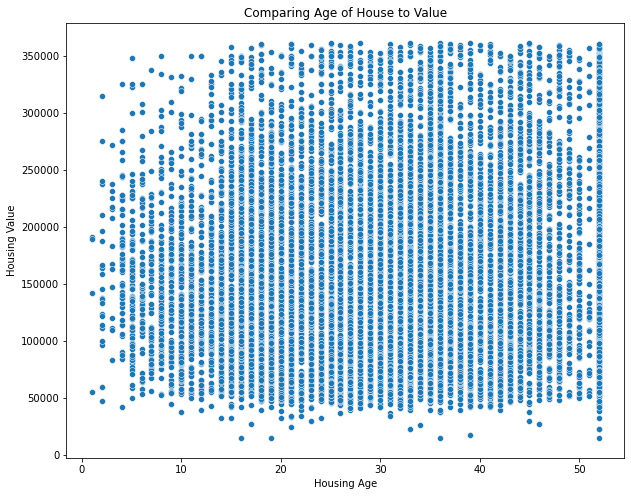

In [33]:
# Would like to see whether there is any correlation between this 2 columns
sns.scatterplot(data = compare_age_value, x='housing_median_age', y='median_house_value')
plt.title('Comparing Age of House to Value')
plt.xlabel('Housing Age')
plt.ylabel('Housing Value')

No Correlation as data is scattered everywhere in this graph. This doesn't help us much.

<AxesSubplot:xlabel='housing_median_age'>

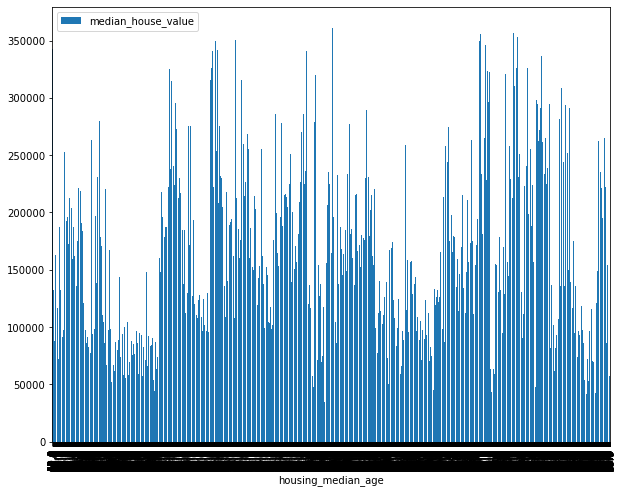

In [34]:
# Plotting a histogram, hopefully can tell us more about the correlation between the 2 columns
bar = compare_age_value.plot(kind = 'bar', x = 'housing_median_age', y = 'median_house_value', width = 0.8)
bar

Although there is no general correlation between house age and price,
we cannot be confident that this case remains true for houses that are over 52 years old, as not much data is provided 
for that. 

### 3. Does the Location play a role in difference in housing age? 

In [35]:
# Shows us different ocean_proximity(location)
ocean_proximity = full_data_clean['ocean_proximity'].unique()
print(ocean_proximity)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


This shows us how many different locations are their in ocean_proximity.

Text(0.5, 0, 'Location')

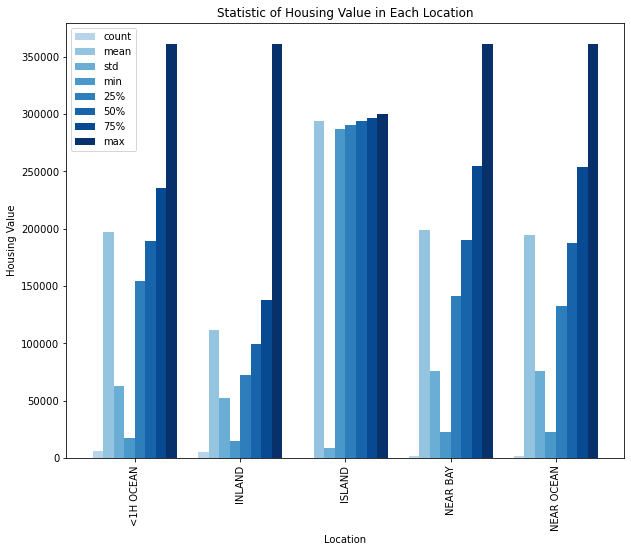

In [36]:
# Shows the statistics of the housing value in each different location
group_stat = full_data_clean.groupby('ocean_proximity')['median_house_value'].describe()
colors = plt.cm.Blues(np.linspace(0.3, 1, len(group_stat.columns)))

group_stat.plot(kind='bar', width=0.8, color = colors)
plt.title('Statistic of Housing Value in Each Location')
plt.ylabel('Housing Value')
plt.xlabel('Location')

This shows us the quartiles, mean, minimum, and maximum values of the houses in all 5 areas. 

Text(0, 0.5, 'Longitude')

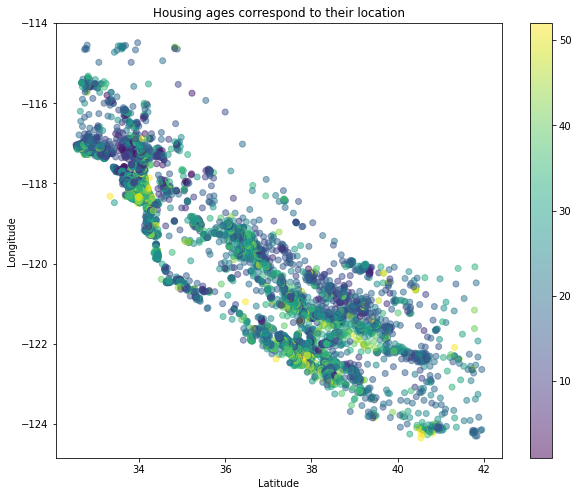

In [37]:
# Distribution for whole location. 
plt.scatter(full_data_clean['latitude'], full_data_clean['longitude'], c = full_data_clean['housing_median_age'], alpha=0.5, cmap='viridis')
plt.colorbar()
plt.title('Housing ages correspond to their location')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Here, the x axis represents the latitude and the y axis represents the longitude. 

The scatter plot shows that the location of the houses changes entirely as the age of existing houses increases.

As the age of the existing houses increases, new houses are being built farther north and west as a means for expansion of residential area housing due to the growing population.

In [48]:
# Creating individual datasets for each locations. (Online research, found that its either urban, suburban, or regional)
# Urban 
near_bay = full_data_clean[full_data_clean['ocean_proximity']=='NEAR BAY'] 

# Urban 
h_ocean = full_data_clean[full_data_clean['ocean_proximity']=='<1H OCEAN']

# Regional
inland = full_data_clean[full_data_clean['ocean_proximity']=='INLAND']

# Suburban 
near_ocean = full_data_clean[full_data_clean['ocean_proximity']=='NEAR OCEAN']

# Regional
island = full_data_clean[full_data_clean['ocean_proximity']=='ISLAND']

After analysis, we found that 'NEAR BAY' and '<1H OCEAN' are urban housing. 'INLAND' and 'ISLAND' are regional, and 'NEAR OCEAN' being suburban. 

Text(0.5, 0, 'Location')

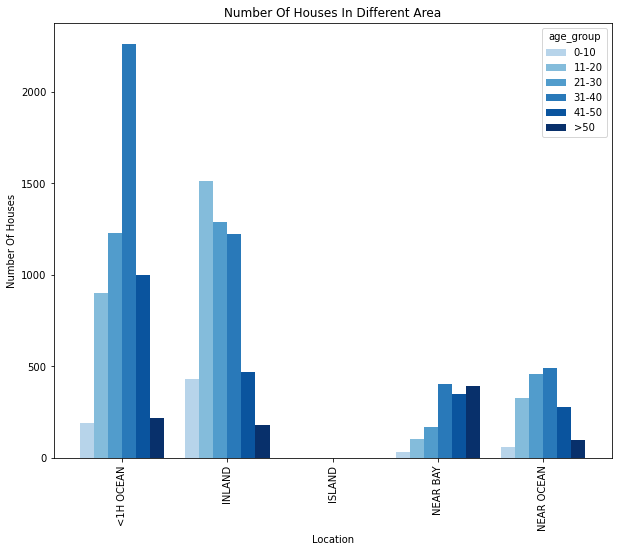

In [50]:
# Creating a variable listing number of houses in different areas in different age groups. 
full_data_clean['age_group'] = pd.cut(full_data_clean['housing_median_age'], 
                                 bins = [0, 10, 20, 30, 40, 50, 52],
                                 labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '>50'])
group_house = full_data_clean.groupby(['ocean_proximity', 'age_group'])['age_group'].count().unstack() 
colors = plt.cm.Blues(np.linspace(0.3, 1, len(group_house.columns)))
group_house.plot(kind = 'bar', width = 0.8, color = colors)

plt.title('Number Of Houses In Different Area')
plt.ylabel('Number Of Houses')
plt.xlabel('Location')

Text(0, 0.5, 'Number of Houses')

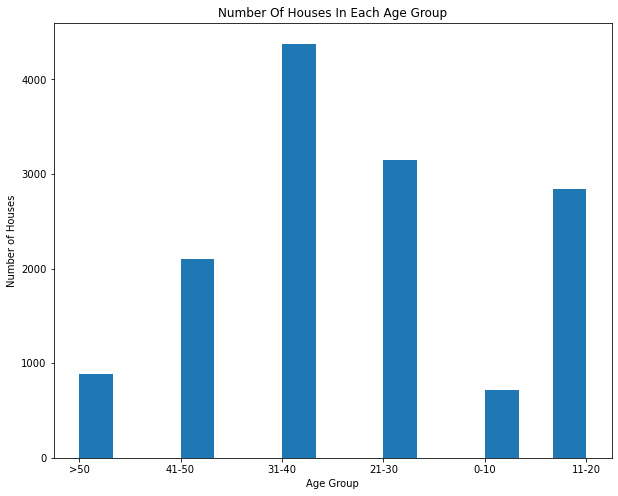

In [52]:
# Looking at the number of houses in each age group. 
plt.hist(full_data_clean.age_group, bins = 15)
plt.title('Number Of Houses In Each Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Houses')

This bar graph shows the frequency of the houses in each age group, with houses of ages 31-40 having the most number of houses.

Text(0, 0.5, 'Longitude')

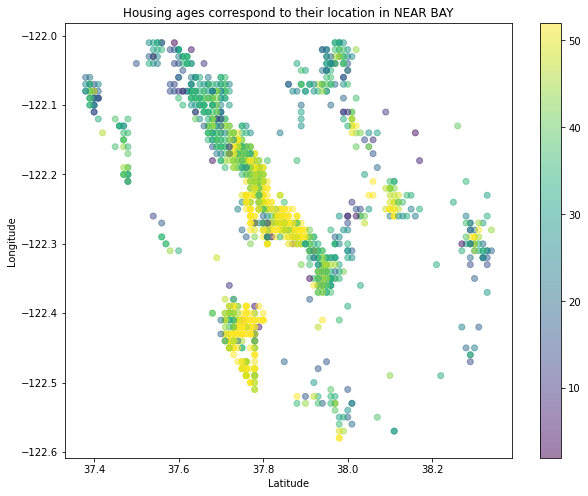

In [53]:
# Distribution for NEAR BAY
plt.scatter(near_bay['latitude'], near_bay['longitude'], c=near_bay['housing_median_age'], alpha=0.5, cmap='viridis')
plt.colorbar()
plt.title('Housing ages correspond to their location in NEAR BAY')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

For the houses at near bay, there's no correlation of houses being built consistently at a certain location before moving on to the next location to built as we can see from the graph, it is quite scattered out.

Text(0, 0.5, 'Longitude')

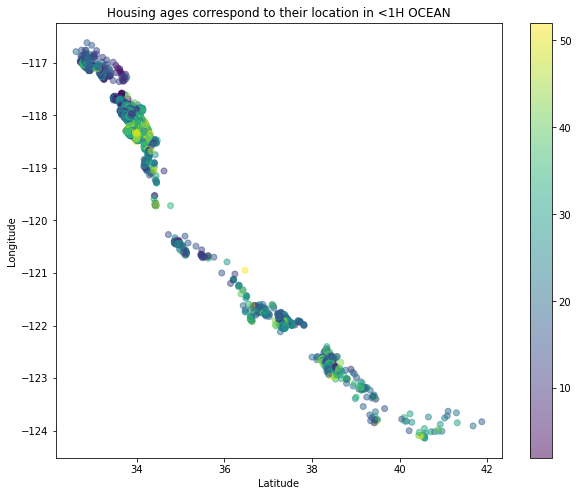

In [54]:
# Distribution for <1H OCEAN
plt.scatter(h_ocean['latitude'], h_ocean['longitude'], c=h_ocean['housing_median_age'], alpha=0.5, cmap='viridis')
plt.colorbar()
plt.title('Housing ages correspond to their location in <1H OCEAN')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

In this graph, we can see that between a year to 20 years ago, most of the houses were built at a latitude of around 32 to 34 and a longitude of around -117 to -118. Hence, it's around the location at the graph below. 

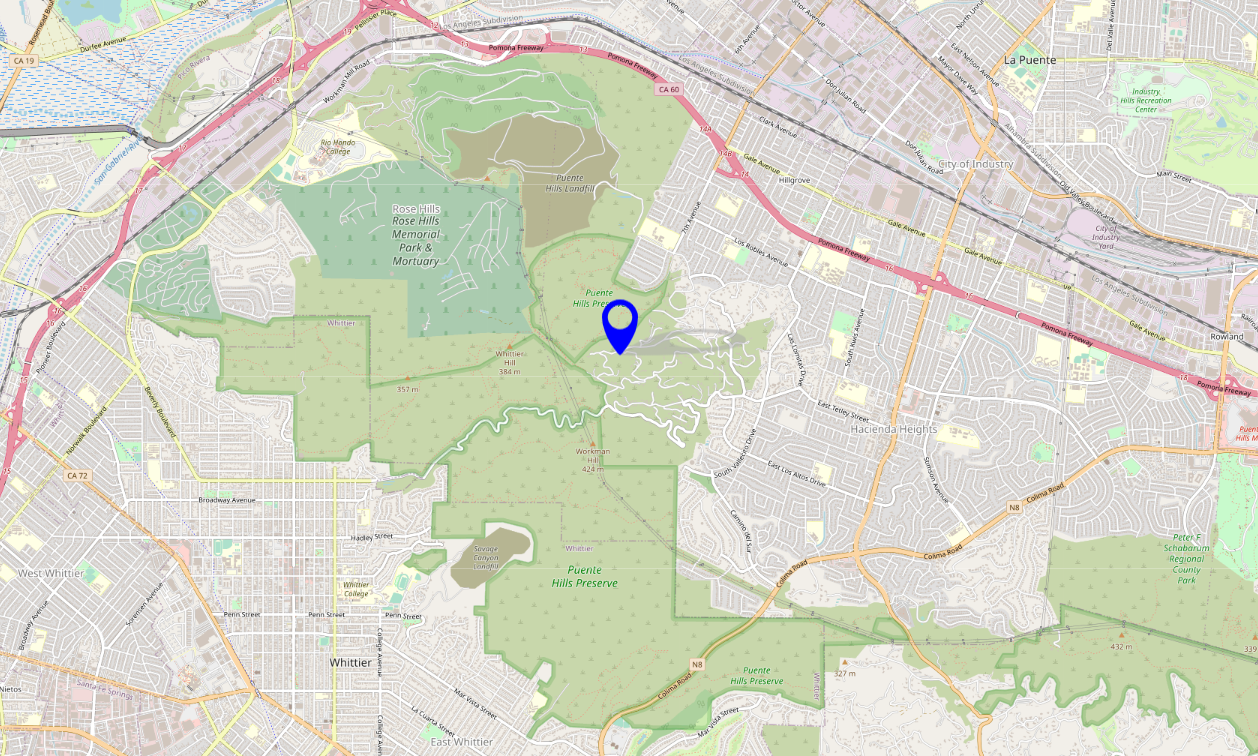

Text(0, 0.5, 'Longitude')

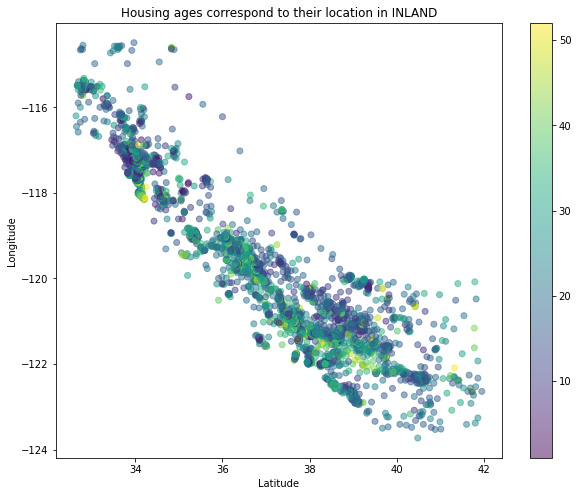

In [55]:
# Distribution for INLAND
plt.scatter(inland['latitude'], inland['longitude'], c=inland['housing_median_age'], alpha=0.5, cmap='viridis')
plt.colorbar()
plt.title('Housing ages correspond to their location in INLAND')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(0, 0.5, 'Longitude')

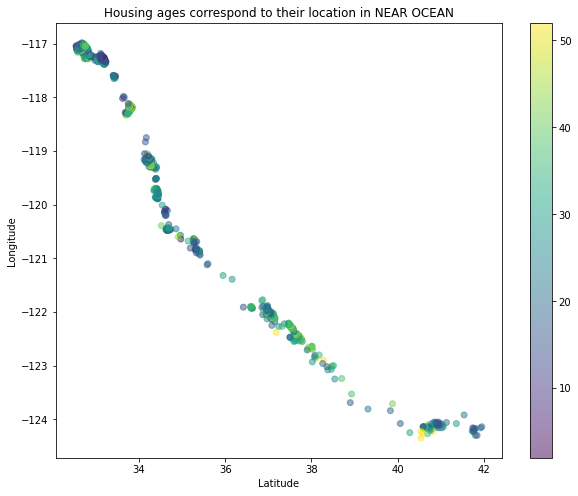

In [56]:
# Distribution for NEAR OCEAN
plt.scatter(near_ocean['latitude'], near_ocean['longitude'], c=near_ocean['housing_median_age'], alpha=0.5, cmap='viridis')
plt.colorbar()
plt.title('Housing ages correspond to their location in NEAR OCEAN')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

Text(0, 0.5, 'Longitude')

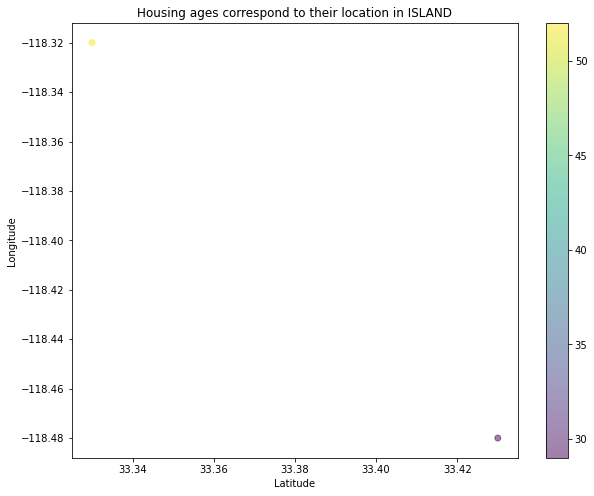

In [57]:
# Distribution for ISLAND
plt.scatter(island['latitude'], island['longitude'], c=island['housing_median_age'], alpha=0.5, cmap='viridis')
plt.colorbar()
plt.title('Housing ages correspond to their location in ISLAND')
plt.xlabel('Latitude')
plt.ylabel('Longitude')

From all the graph above, you can see that there's no correlation whatsoever between housing age and the location as the houses were scattered around california with no relation to the location. Hence, in simpler terms, the houses were built either 1 to 52 years ago around california. 

### 4. Does the Location play a role in difference in housing value?

In [58]:
# Selecting data into 5 different dataframes with relation to the location. 
woc_nb = full_data_clean[full_data_clean['ocean_proximity']=='NEAR BAY'].drop(columns=['longitude','latitude'])
woc_1o = full_data_clean[full_data_clean['ocean_proximity']=='<1H OCEAN'].drop(columns=['longitude','latitude'])
woc_in = full_data_clean[full_data_clean['ocean_proximity']=='INLAND'].drop(columns=['longitude','latitude'])
woc_no = full_data_clean[full_data_clean['ocean_proximity']=='NEAR OCEAN'].drop(columns=['longitude','latitude'])
woc_is = full_data_clean[full_data_clean['ocean_proximity']=='ISLAND'].drop(columns=['longitude','latitude'])

<AxesSubplot:>

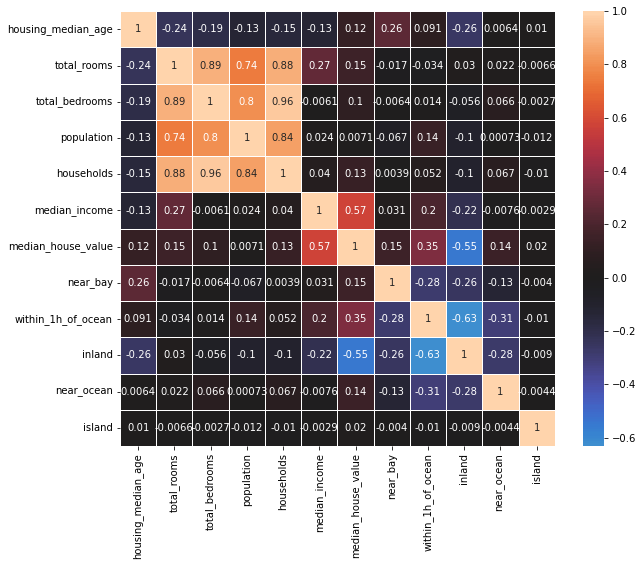

In [59]:
# Checking to see the correlation between housing age and housing value with different location. 
whouse = full_data_clean.drop(columns=['longitude','latitude'])
sns.heatmap(whouse.corr(), annot=True, center=0, square=True, linewidths=.5)

Text(0, 0.5, 'Housing Value')

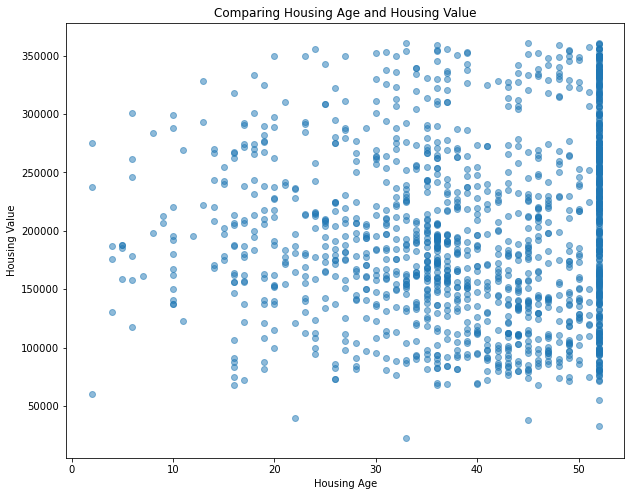

In [60]:
plt.scatter(near_bay['housing_median_age'], near_bay['median_house_value'], alpha=0.5)
plt.title('Comparing Housing Age and Housing Value')
plt.xlabel('Housing Age')
plt.ylabel('Housing Value')

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

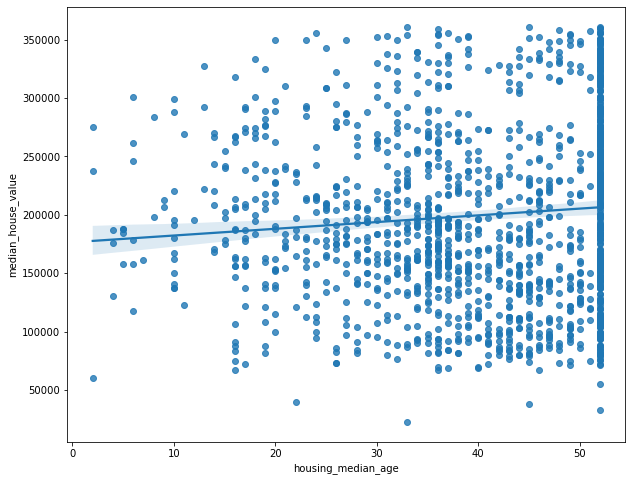

In [61]:
sns.regplot(data=near_bay, x='housing_median_age', y='median_house_value')

From the above 2 graphs, we can see that there's not much correlation as it is quite scattered. But we can see from the regression plot that the average house value varies between 160,000 to 200,000 throughout the housing age. 

Text(0.5, 0, 'location')

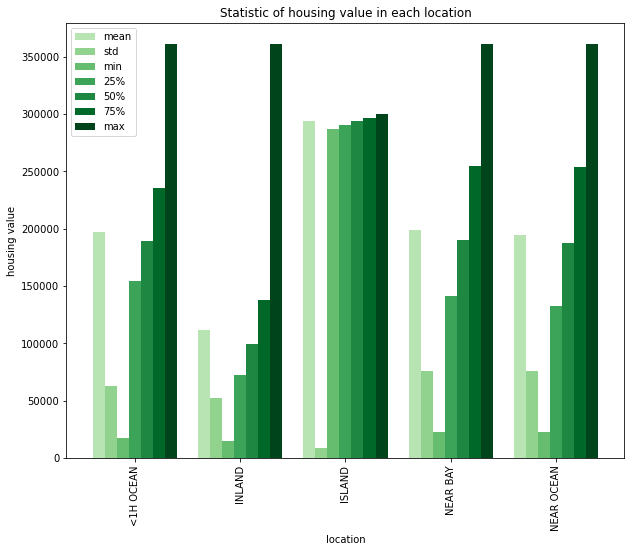

In [62]:
group_stat = full_data_clean.groupby('ocean_proximity')['median_house_value'].describe().drop(columns=['count'])
colorss = plt.cm.Greens(np.linspace(0.3, 1, len(group_stat.columns)))
group_stat.plot(kind='bar', width=0.8, color=colorss)
plt.title('Statistic of housing value in each location')
plt.ylabel('housing value')
plt.xlabel('location')

### 5. Which region has the highest average income?

In [63]:
full_data_clean.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14065    -121.09     39.48                25.0       1665.0           374.0   
14066    -121.21     39.49                18.0        697.0           150.0   
14067    -121.22     39.43                17.0       2254.0           485.0   
14068    -121.32     39.43                18.0       1860.0           409.0   
14069    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
14065       845.0       330.0         1.5603             78100.0   
14066       356.0       114.0         2.5568             77100.0   
14067      1007.0       433.0         1.7000             92300.0   
14068       741.0       349.0         1.8672             84700.0   
14069      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  near_bay  within_1h_of_ocean  inland  near_ocean  \
14065          INLAND         0                   0       1           0   
14066          INLAND         0                   0       1           0   
14067          INLAND         0                   0       1           0   
14068          INLAND         0                   0       1           0   
14069          INLAND         0                   0       1           0   

       island age_group  
14065       0     21-30  
14066       0     11-20  
14067       0     11-20  
14068       0     11-20  
14069       0     11-20

In [64]:
# Creating a new column called 'region' and initialize it with 'rural'
full_data_clean['region'] = 'rural'
# They are catergorized depends on ther ocean_proximity and their location on the map
# After checking on google maps, we found that they can be categorised by 3 different region as shown before this 
full_data_clean.loc[(full_data_clean['ocean_proximity']=='NEAR BAY')|(full_data_clean['ocean_proximity']=='<1H OCEAN'), 'region'] = 'urban'
full_data_clean.loc[(full_data_clean['ocean_proximity']=='NEAR OCEAN'), 'region'] = 'suburban'

In [65]:
full_data_clean

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.25     37.85                52.0       1274.0           235.0   
1        -122.25     37.85                52.0       1627.0           280.0   
2        -122.25     37.85                52.0        919.0           213.0   
3        -122.25     37.84                52.0       2535.0           489.0   
4        -122.25     37.84                52.0       3104.0           687.0   
...          ...       ...                 ...          ...             ...   
14065    -121.09     39.48                25.0       1665.0           374.0   
14066    -121.21     39.49                18.0        697.0           150.0   
14067    -121.22     39.43                17.0       2254.0           485.0   
14068    -121.32     39.43                18.0       1860.0           409.0   
14069    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           558.0       219.0         5.6431            341300.0   
1           565.0       259.0         3.8462            342200.0   
2           413.0       193.0         4.0368            269700.0   
3          1094.0       514.0         3.6591            299200.0   
4          1157.0       647.0         3.1200            241400.0   
...           ...         ...            ...                 ...   
14065       845.0       330.0         1.5603             78100.0   
14066       356.0       114.0         2.5568             77100.0   
14067      1007.0       433.0         1.7000             92300.0   
14068       741.0       349.0         1.8672             84700.0   
14069      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  near_bay  within_1h_of_ocean  inland  near_ocean  \
0            NEAR BAY         1                   0       0           0   
1            NEAR BAY         1                   0       0           0   
2            NEAR BAY         1                   0       0           0   
3            NEAR BAY         1                   0       0           0   
4            NEAR BAY         1                   0       0           0   
...               ...       ...                 ...     ...         ...   
14065          INLAND         0                   0       1           0   
14066          INLAND         0                   0       1           0   
14067          INLAND         0                   0       1           0   
14068          INLAND         0                   0       1           0   
14069          INLAND         0                   0       1           0   

       island age_group region  
0           0       >50  urban  
1           0       >50  urban  
2           0       >50  urban  
3           0       >50  urban  
4           0       >50  urban  
...       ...       ...    ...  
14065       0     21-30  rural  
14066       0     11-20  rural  
14067       0     11-20  rural  
14068       0     11-20  rural  
14069       0     11-20  rural  

[14070 rows x 17 columns]

In [66]:
# Updating the variables
near_bay = full_data_clean[full_data_clean['ocean_proximity']=='NEAR BAY']
h_ocean = full_data_clean[full_data_clean['ocean_proximity']=='<1H OCEAN']
inland = full_data_clean[full_data_clean['ocean_proximity']=='INLAND']
near_ocean = full_data_clean[full_data_clean['ocean_proximity']=='NEAR OCEAN']
island = full_data_clean[full_data_clean['ocean_proximity']=='ISLAND']

woc_nb = full_data_clean[full_data_clean['ocean_proximity']=='NEAR BAY'].drop(columns=['longitude','latitude'])
woc_1o = full_data_clean[full_data_clean['ocean_proximity']=='<1H OCEAN'].drop(columns=['longitude','latitude'])
woc_in = full_data_clean[full_data_clean['ocean_proximity']=='INLAND'].drop(columns=['longitude','latitude'])
woc_no = full_data_clean[full_data_clean['ocean_proximity']=='NEAR OCEAN'].drop(columns=['longitude','latitude'])
woc_is = full_data_clean[full_data_clean['ocean_proximity']=='ISLAND'].drop(columns=['longitude','latitude'])

In [67]:
# Looking at the statistics of the region for the given dataset 
group_income_stat = full_data_clean.groupby('region')['median_income'].describe().drop(columns=['count'])
group_income_stat

mean       std     min      25%     50%      75%     max
region                                                                
rural     2.945153  1.110629  0.4999  2.10940  2.8000  3.65770  6.0000
suburban  3.261736  1.131049  0.5360  2.37500  3.2059  4.11610  5.9547
urban     3.531114  1.180565  0.4999  2.62935  3.5211  4.41325  6.0050

Text(0.5, 0, 'Region')

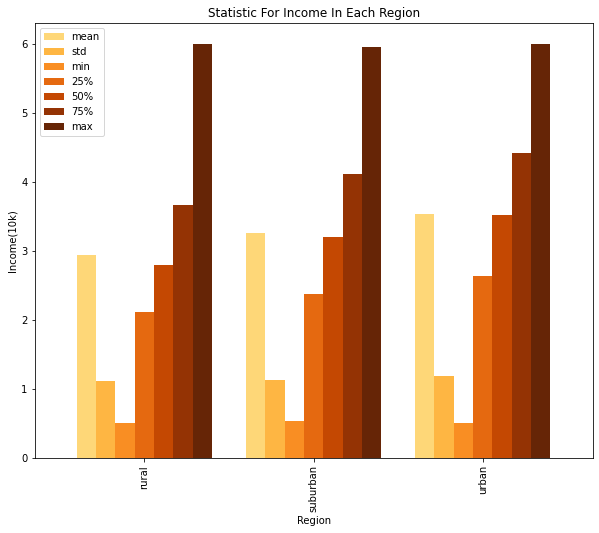

In [68]:
colorsss = plt.cm.YlOrBr(np.linspace(0.3, 1, len(group_income_stat.columns)))
group_income_stat.plot(kind='bar', width=0.8, color=colorsss)
plt.title('Statistic For Income In Each Region')
plt.ylabel('Income(10k)')
plt.xlabel('Region')

From this graph, we can see that there's 3 different regions. The region with the highest average income will be urban as urban has the highest upper quartile value and a higher median value compared to the other 2 regions. Rural and Suburban region doesn't entirely have a low average income, it's just not that high.  

Urban area has the highest average income compared to the other regions. 

### 6. From the previous question, which region has the highest housing value?

In [69]:
# Looking at the statistics of the region for the given dataset 
group_house_value_stat = full_data_clean.groupby('region')['median_house_value'].describe().drop(columns=['count'])
group_house_value_stat

mean           std      min       25%       50%       75%  \
region                                                                         
rural     112000.508720  52191.305921  14999.0   72500.0   99400.0  137500.0   
suburban  194250.145943  76265.682708  22500.0  132200.0  187500.0  254000.0   
urban     197588.365040  65897.454667  17500.0  153100.0  189200.0  238300.0   

               max  
region              
rural     361100.0  
suburban  361500.0  
urban     361300.0

Text(0.5, 0, 'Region')

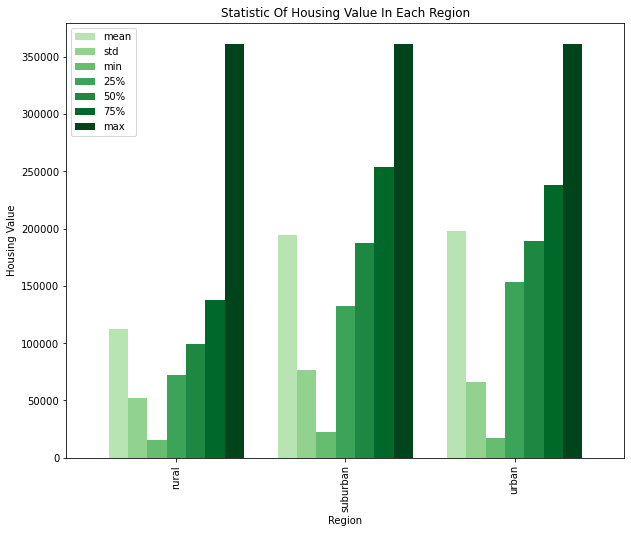

In [70]:
group_house_value_stat = full_data_clean.groupby('region')['median_house_value'].describe().drop(columns=['count'])
colorss = plt.cm.Greens(np.linspace(0.3, 1, len(group_house_value_stat.columns)))
group_house_value_stat.plot(kind='bar', width=0.8, color=colorss)
plt.title('Statistic Of Housing Value In Each Region')
plt.ylabel('Housing Value')
plt.xlabel('Region')

This graph provides us the statistics of housing value in each region. From this graph, we can see the 3 different regions for housing value. We can see that either suburban or urban area has a higher housing value but because it's harder to see from the graph, the statistics table shows us that urban area has a higher average housing value of 197588, while suburban area has an average housing value of 194250. But from the graph, it shows that suburban area has a higher upper quartile value compared to urban area but urban has a higher lower quartile value compared to suburban area. Hence, if we were to graph for urban area, it will provide us a more clearer and detailed graph. 

Urban has the highest housing value between the 3 regions. 

In [71]:
# Houses that are between 2 locations. 
# Organizing the data 
full_data_clean.sort_values(by='longitude', ascending=False)

# Plotting a scatter graph with data from row 870 - 890. 
nb_1o = full_data_clean.loc[800:1000]
in_1o = full_data_clean.loc[900:1000]
in_no = full_data_clean.loc[2450:2650]
no_is = full_data_clean.loc[full_data_clean['ocean_proximity'].isin(['NEAR OCEAN', 'ISLAND'])]

Bottom left is Near Bay area, top right is <1H Ocean area.


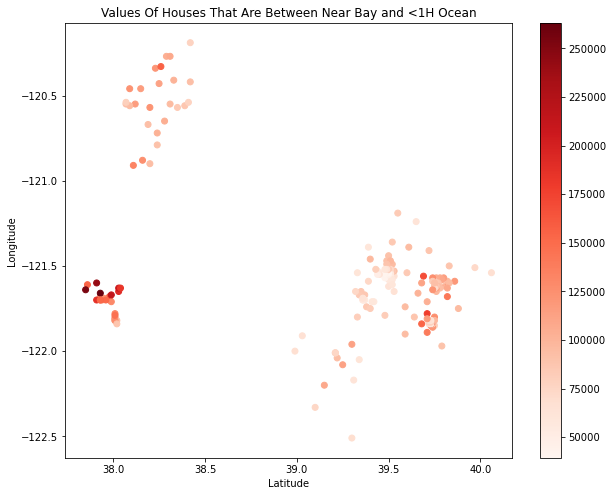

In [72]:
# Near Bay and <1H Ocean Area 
# Plotting a scatter plot with x-axis as latitude and y-axis as longitude with the color being the house value.    
plt.scatter(x = nb_1o['latitude'], y = nb_1o['longitude'], c = nb_1o['median_house_value'], cmap='Reds')
plt.title('Values Of Houses That Are Between Near Bay and <1H Ocean')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar()

print('Bottom left is Near Bay area, top right is <1H Ocean area.')

The scatter plot above shows the the values of the houses at different regions between near bay and <1H ocean. There is no specific correlation for if the houses are valued higher/lower if they are located either near bay or <1H, but houses located somewhere in between and further south have the highest values, with some houses even valued over 250000. 

Bottom left is Inland area, top right is <1H Ocean area.


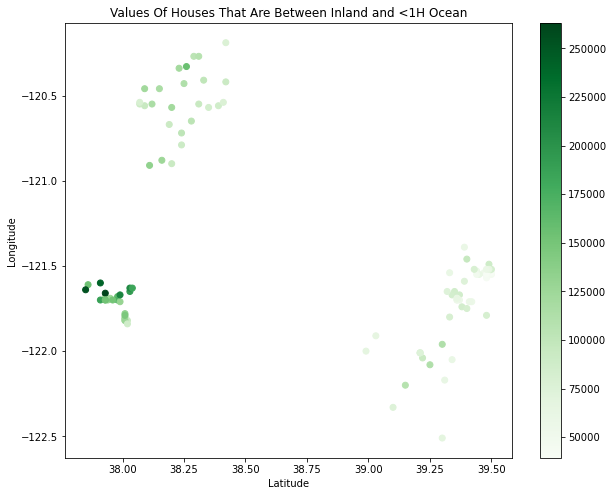

In [73]:
# Inland and <1H Ocean Area. 
# Plotting a scatter plot with x-axis as latitude and y-axis as longitude with the color being the house value.
plt.scatter(x = in_1o['latitude'], y = in_1o['longitude'], c = in_1o['median_house_value'], cmap='Greens')
plt.title('Values Of Houses That Are Between Inland and <1H Ocean')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar()

print('Bottom left is Inland area, top right is <1H Ocean area.')

The scatter plot above shows the values of the houses at different regions between Inland and <1H ocean. There is no specific correlation for if the houses are valued higher/lower if they are located near either Inland or <1H, but houses located somewhere in between and further south have the highest values, with some houses even valued over 250000. 

Top left is Inland area, bottom right is Near ocean area.


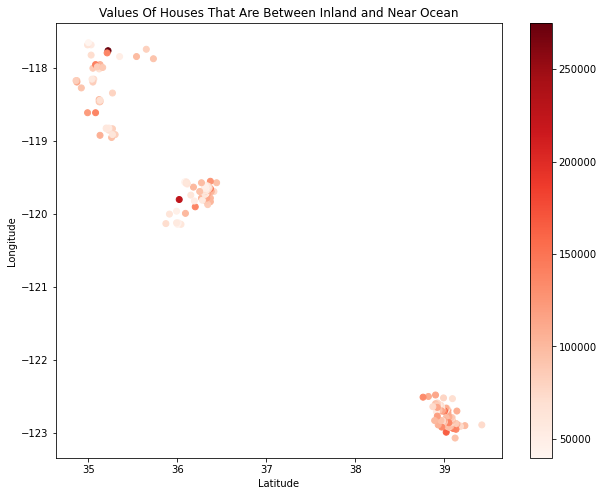

In [74]:
# Inland and Near Ocean Area 
# Plotting a scatter plot with x-axis as latitude and y-axis as longitude with the color being the house value.
plt.scatter(x = in_no['latitude'], y = in_no['longitude'], c = in_no['median_house_value'], cmap='Reds')
plt.title('Values Of Houses That Are Between Inland and Near Ocean')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar()

print('Top left is Inland area, bottom right is Near ocean area.')

The scatter plot above shows the values of the houses at different regions between Inland and Near ocean. Here, the houses can be grouped into 3 distinct locations: Near Inland area (Least longitude and latitidue), area between Inland ocean and Near ocean (slightly higher longitude and latitude), somewhat Near ocean area (highest latitude and longitude). From this, we can deduce that the closer the house is to an inland area, the higher the value can be, potentially reaching over 250000. 

### 7. After looking at all the data, is a house in a higher income area likely to be more expensive?

Urban areas include near bay and <1H ocean, suburban areas include near ocean, and rural areas include inland and island.
Although near ocean areas have relatively high median house prices, housing areas that are slightly further than the ocean are 
valued significantly less. Urban areas have median house values very similar to near ocean ones, and houses only slightly
south to <1H has values comparable to ones actually located at <1H with houses further east of near bay having the same
result. This suggests that the location of the house plays a significant role in predicting/determining house value, 
however we have to take note that this is probably largely due to the fact that these locations have high mean/median incomes. 
So, a house in a higher income area is likely to be more expensive.  

### 8. Is there any correlation between house price with number of bedrooms vs house price with total rooms?

In [75]:
full_data_clean

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.25     37.85                52.0       1274.0           235.0   
1        -122.25     37.85                52.0       1627.0           280.0   
2        -122.25     37.85                52.0        919.0           213.0   
3        -122.25     37.84                52.0       2535.0           489.0   
4        -122.25     37.84                52.0       3104.0           687.0   
...          ...       ...                 ...          ...             ...   
14065    -121.09     39.48                25.0       1665.0           374.0   
14066    -121.21     39.49                18.0        697.0           150.0   
14067    -121.22     39.43                17.0       2254.0           485.0   
14068    -121.32     39.43                18.0       1860.0           409.0   
14069    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           558.0       219.0         5.6431            341300.0   
1           565.0       259.0         3.8462            342200.0   
2           413.0       193.0         4.0368            269700.0   
3          1094.0       514.0         3.6591            299200.0   
4          1157.0       647.0         3.1200            241400.0   
...           ...         ...            ...                 ...   
14065       845.0       330.0         1.5603             78100.0   
14066       356.0       114.0         2.5568             77100.0   
14067      1007.0       433.0         1.7000             92300.0   
14068       741.0       349.0         1.8672             84700.0   
14069      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  near_bay  within_1h_of_ocean  inland  near_ocean  \
0            NEAR BAY         1                   0       0           0   
1            NEAR BAY         1                   0       0           0   
2            NEAR BAY         1                   0       0           0   
3            NEAR BAY         1                   0       0           0   
4            NEAR BAY         1                   0       0           0   
...               ...       ...                 ...     ...         ...   
14065          INLAND         0                   0       1           0   
14066          INLAND         0                   0       1           0   
14067          INLAND         0                   0       1           0   
14068          INLAND         0                   0       1           0   
14069          INLAND         0                   0       1           0   

       island age_group region  
0           0       >50  urban  
1           0       >50  urban  
2           0       >50  urban  
3           0       >50  urban  
4           0       >50  urban  
...       ...       ...    ...  
14065       0     21-30  rural  
14066       0     11-20  rural  
14067       0     11-20  rural  
14068       0     11-20  rural  
14069       0     11-20  rural  

[14070 rows x 17 columns]

Text(0, 0.5, 'House Value')

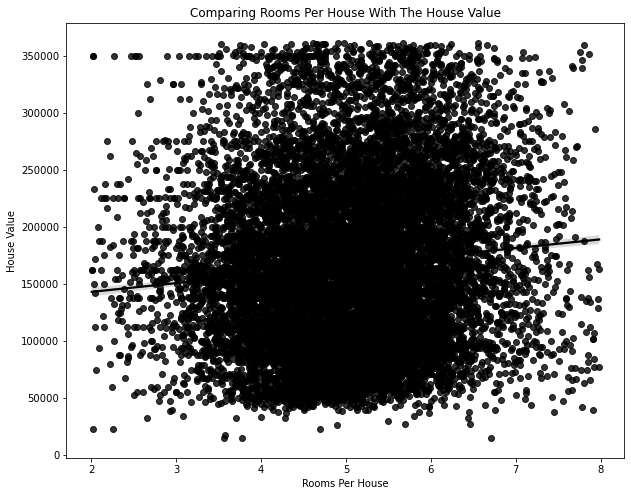

In [76]:
full_data_clean['rooms_per_house'] = full_data_clean['total_rooms']/full_data_clean['households']
full_data_clean = full_data_clean[(full_data_clean.rooms_per_house < 8) & (full_data_clean.rooms_per_house > 2)]
sns.regplot(data = full_data_clean, x = 'rooms_per_house', y = 'median_house_value', color = 'black')
plt.title('Comparing Rooms Per House With The House Value')
plt.xlabel('Rooms Per House')
plt.ylabel('House Value')

No correlation as data is scattered. This graph cant tell us much about whether there's a correlation between whether the rooms per house affects the housing value. 

Text(0, 0.5, 'House Value')

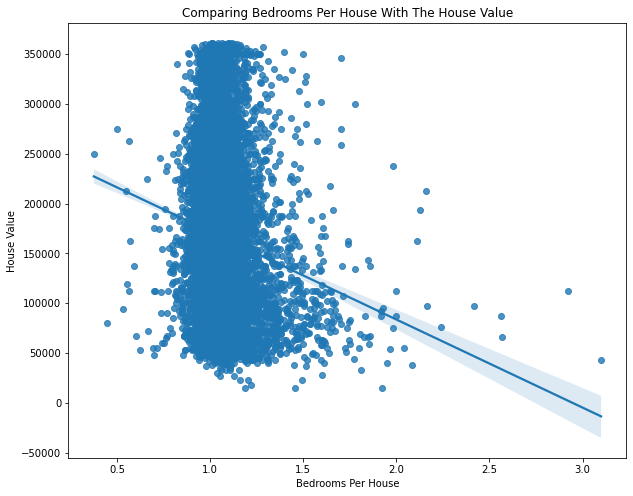

In [77]:
full_data_clean['bedrooms_per_house'] = full_data_clean['total_bedrooms']/full_data_clean['households']
# full_data_clean = full_data_clean[(full_data_clean.bedrooms_per_house < 8) & (full_data_clean.bedrooms_per_house > 2)]
sns.regplot(data = full_data_clean, x = 'bedrooms_per_house', y = 'median_house_value')
plt.title('Comparing Bedrooms Per House With The House Value')
plt.xlabel('Bedrooms Per House')
plt.ylabel('House Value')

In [78]:
X = full_data_clean[['rooms_per_house']] # create a dataframe with just the BMI values
Y = full_data_clean['median_house_value'] # create a dataframe with just the Y values

linear = LinearRegression(fit_intercept=True) # instantatiate the linear regression model
linear.fit(X, Y) # fit the data to the model
training_score = linear.score(X, Y) # calculate rsq for the training set

print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))

Coefficients are [7675.64]
Intercept is 127744.124


If the number of rooms in an average household increase by 1, then the value of the house is expected to increase by $28,300 on average

In [79]:
# Defining training and testing sets for dependent and independent variables:
x_train = full_data_clean_train['total_rooms']
y_train = full_data_clean_train['median_house_value']
x_test = full_data_clean_test['total_rooms']
y_test = full_data_clean_test['median_house_value']

In [80]:
# Determining the best model: 
training = np.zeros(15)
testing = np.zeros(15)
for ord in range(1,16): 
    rng = np.random.RandomState(1)
    reg_ord = ord; 
    model = LinearRegression(fit_intercept = True).fit(np.vander(x_train, reg_ord+1), y_train)
    training[ord-1] = model.score(np.vander(x_train, reg_ord+1), y_train)
    y_pred = model.predict(np.vander(x_test, reg_ord+1))
    testing[ord-1] = r2_score(y_test, y_pred)

Text(0.5, 1.0, 'Model Accuracy For Predicting Median House Value From Total Rooms')

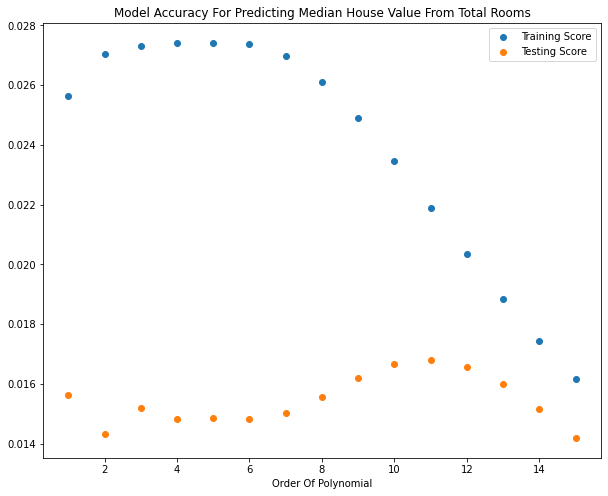

In [81]:
plt.scatter(range(1,16), training, label = 'Training Score')
plt.scatter(range(1,16), testing, label = 'Testing Score')
plt.legend()
plt.xlabel('Order Of Polynomial')
plt.title('Model Accuracy For Predicting Median House Value From Total Rooms')

The above graph shows that the best model is an 11th order polynomial. However, even this model is extremely bad at predicting the relationship (testing score is **SHOCKINGLY!!!!!!!!** low at less than 0.02). This indicates that there appears to be no correlation between total rooms and median house value. This is obvious from looking at the scatterplot of the variables:

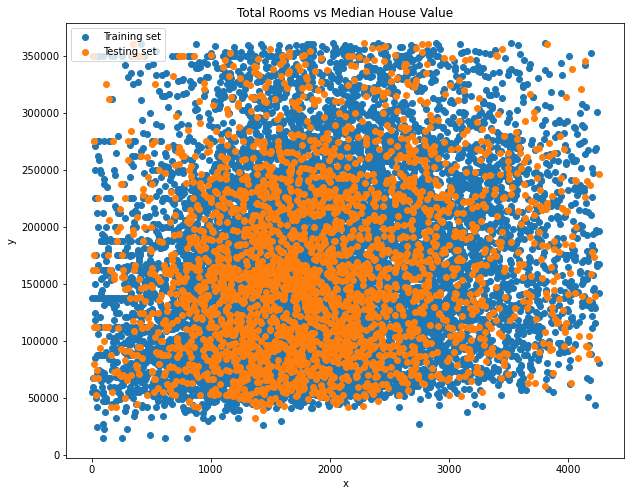

In [82]:
# Plotting the training set:
plt.scatter(x_train, y_train, label='Training set')
plt.scatter(x_test,y_test, label='Testing set')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper left")
plt.title('Total Rooms vs Median House Value')
plt.show()

Are the relationships the same? Why might they be different or the same? Is there any evidence to support your hypothesis?

The correlation of house price and number of total rooms is slightly positive, meaning that houses with more rooms are valued higher.
The correlation of house price and number of bedrooms is negative, meaning that houses with more bedrooms are valued less. 
This may be due to the fact that more bedrooms risk oversupply, has lack of flexibility, and causes decreased living space. 
The data suggests that having more total rooms does increase the value of the average household (increase of 1 room- $28,300),
and mostly if those rooms are function rooms, unless the houses have less than 2 bedrooms. 

## Linear Regression

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [84]:
# Updating the variables
near_bay = full_data_clean[full_data_clean['ocean_proximity']=='NEAR BAY']
h_ocean = full_data_clean[full_data_clean['ocean_proximity']=='<1H OCEAN']
inland = full_data_clean[full_data_clean['ocean_proximity']=='INLAND']
near_ocean = full_data_clean[full_data_clean['ocean_proximity']=='NEAR OCEAN']
island = full_data_clean[full_data_clean['ocean_proximity']=='ISLAND']

woc_nb = full_data_clean[full_data_clean['ocean_proximity']=='NEAR BAY'].drop(columns=['longitude','latitude'])
woc_1o = full_data_clean[full_data_clean['ocean_proximity']=='<1H OCEAN'].drop(columns=['longitude','latitude'])
woc_in = full_data_clean[full_data_clean['ocean_proximity']=='INLAND'].drop(columns=['longitude','latitude'])
woc_no = full_data_clean[full_data_clean['ocean_proximity']=='NEAR OCEAN'].drop(columns=['longitude','latitude'])
woc_is = full_data_clean[full_data_clean['ocean_proximity']=='ISLAND'].drop(columns=['longitude','latitude'])

In [85]:
# Line of best fit for each location's average income and house value. 
p1 = np.poly1d(np.polyfit(near_bay['median_income'], near_bay['median_house_value'], 1))
p2= np.poly1d(np.polyfit(h_ocean['median_income'], h_ocean['median_house_value'], 1))
p3= np.poly1d(np.polyfit(inland['median_income'], inland['median_house_value'], 1))
p4= np.poly1d(np.polyfit(near_ocean['median_income'], near_ocean['median_house_value'], 1))
p5= np.poly1d(np.polyfit(island['median_income'], island['median_house_value'], 1))

print(f'The line of best fit for Near Bay is{p1}')
print(f'The line of best fit for <1H Ocean is{p2}')
print(f'The line of best fit for Inland is{p3}')
print(f'The line of best fit for Near Ocean is{p4}')
print(f'The line of best fit for Island is{p5}')

The line of best fit for Near Bay is 
3.681e+04 x + 7.396e+04
The line of best fit for <1H Ocean is 
2.851e+04 x + 9.53e+04
The line of best fit for Inland is 
2.867e+04 x + 2.702e+04
The line of best fit for Near Ocean is 
3.591e+04 x + 7.727e+04
The line of best fit for Island is 
1.59e+04 x + 2.461e+05


In [86]:
# Line of best fit for each location's house value and house age
p1 = np.poly1d(np.polyfit(near_bay['housing_median_age'], near_bay['median_house_value'], 1))
p2= np.poly1d(np.polyfit(h_ocean['housing_median_age'], h_ocean['median_house_value'], 1))
p3= np.poly1d(np.polyfit(inland['housing_median_age'], inland['median_house_value'], 1))
p4= np.poly1d(np.polyfit(near_ocean['housing_median_age'], near_ocean['median_house_value'], 1))
p5= np.poly1d(np.polyfit(island['housing_median_age'], island['median_house_value'], 1))

print(f'The line of best fit for Near Bay is{p1}')
print(f'The line of best fit for <1H Ocean is{p2}')
print(f'The line of best fit for Inland is{p3}')
print(f'The line of best fit for Near Ocean is{p4}')
print(f'The line of best fit for Island is{p5}')

The line of best fit for Near Bay is 
577.2 x + 1.761e+05
The line of best fit for <1H Ocean is 
-306.7 x + 2.068e+05
The line of best fit for Inland is 
-518.5 x + 1.247e+05
The line of best fit for Near Ocean is 
957.6 x + 1.651e+05
The line of best fit for Island is 
543.5 x + 2.717e+05


After going through the graphs and analysis, we came up with the line of best fit for each location's average income in relation to the house value and also the line of best fit for each location's house value in relation to the house age. It provides us with different line of best fit for each locations depending on the y variable. 

## Is a house’s attributes or location more important in determining its price?

- There is no general correlation between house age and price
- A house in a higher income area is likely to be more expensive
- Attributes (total number of rooms, median income) have a positive correlation on house value

Location, mainly ocean proximity and the areas surrounding that, play a pretty significant role in determining the price of the houses. Suburban areas are valued the highest on average, while rural areas are valued the lowest on average. However, 
the areas with higher valued houses are higher income areas, and areas with lower valued houses are lower income areas. 
While the characteristics of an area can influence income, it is primarily the creation of wealth through various factors and actions that leads to the development and prosperity of an area, meaning that it is the cause of people with higher income
that make those areas have the highest value houses, not vice versa. So, attributes are more important in determining a house's price. 

Shows us the latitude and longitude of a specific location

https://www.findlatitudeandlongitude.com/?lat=32.7384345&lon=-115.9942087&zoom=&map_type=ROADMAP